In [27]:
import pandas as pd
import numpy as np
import locale
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
df = pd.read_csv('temp.csv')

In [3]:
df.head()

,Unnamed: 0,City_Name,Establishment_Type,Name,Rating,No_of_Reviews,Other_Ratings,Timings,Latitude,Longitude,...,Range_n_Cuisine,Address,Contact_No,Changed_Tag,Range_Cuisine_new,Cuisine,Cuisines,Meals,Special Diets,PRICE RANGE
0,3,Abbotsford,Restaurant,Townhall Public House Abbotsford,4.0,123,"{'Food': 3.5, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun', 'times': ['10:00 AM - 12:00 A...",49.047710,-122.291150,...,"['$$ - $$$', 'Bar', 'Gastropub', 'Canadian']","33720 South Fraser Way, Abbotsford, British Co...",+1 604-746-2000,All reviews brunch fish chips salad pub fo...,"Bar,Gastropub,Canadian","Gastropub, Bar, Canadian","Gastropub, Bar, Canadian,Bar,Gastropub,Canadian",None,NaN,NaN
1,8,Abbotsford,Restaurant,White Spot,4.0,80,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A...",NaN,49.037080,-122.225850,...,"['$$ - $$$', 'Canadian', 'Vegetarian Friendly'...","36063 North Parallel Rd, Abbotsford, British C...",+1 604-864-5744,All reviews eggs bacon burger fries salad ...,"Canadian,Vegetarian,Friendly,Gluten,Free,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Gluten,F...","Breakfast, Lunch, Dinner, Brunch","Breakfast, Lunch, Dinner, Brunch",None
2,12,Abbotsford,Restaurant,Common Place Cafe,4.5,18,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}","[{'days': 'Mon - Sat', 'times': ['7:00 AM - 4:...",49.044353,-122.281450,...,"['₹', 'Canadian', 'Vegetarian Friendly', 'Vega...","33933 Gladys Ave MCC Centre, Abbotsford, Briti...",+1 604-851-7737,All reviews borscht fair trade cottage chee...,"Canadian,Vegetarian,Friendly,Vegan,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Vegan,Op...","Breakfast, Lunch, Brunch","Breakfast, Lunch, Brunch",None
3,15,Abbotsford,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"['$$ - $$$', 'Italian', 'Pizza', 'Canadian']","6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,"Italian,Pizza,Canadian","Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner","Lunch, Dinner",None
4,18,Abbotsford,Restaurant,Keg Restaurant & Bar,4.0,199,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Sat', 'times': ['4:00 PM - 10...",49.041615,-122.277780,...,"['$$ - $$$', 'American', 'Steakhouse', 'Bar']","2142 West Railway St, Abbotsford, British Colu...",+1 604-855-9893,All reviews prime rib steak half lobster c...,"American,Steakhouse,Bar","Steakhouse, Bar, Canadian, American","Steakhouse, Bar, Canadian, American,American,S...","Dinner, After-hours","Dinner, After-hours",None


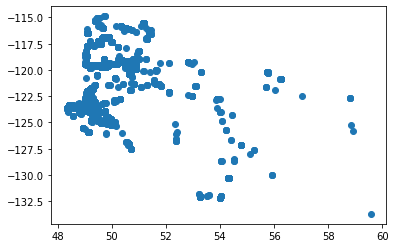

In [4]:
lat = df['Latitude']
lon = df['Longitude']

import matplotlib.pyplot as plt

plt.scatter(lat, lon)
plt.show()

In [5]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
 

#Manhattan Distance Between the two Lat/Lons:
 
def dummy_manhattan_distance(lat1, lng1, lat2=0, lng2=0):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

In [6]:
import numpy as np
dummy_manhattan_distance(lat[0], lon[0])

13244.9906854658

In [7]:
df.isnull().sum()

Unnamed: 0               0
City_Name                0
Establishment_Type       0
Name                     1
Rating                   0
No_of_Reviews            0
Other_Ratings            0
Timings               2861
Latitude                 0
Longitude                0
Tags                     0
Details                  0
Rank                     1
Range_n_Cuisine          0
Address                  0
Contact_No               0
Changed_Tag              0
Range_Cuisine_new        1
Cuisine                  0
Cuisines                 0
Meals                    0
Special Diets         2654
PRICE RANGE           2731
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(8787, 23)

In [10]:
df.columns

Index(['Unnamed: 0', 'City_Name', 'Establishment_Type', 'Name', 'Rating',
       'No_of_Reviews', 'Other_Ratings', 'Timings', 'Latitude', 'Longitude',
       'Tags', 'Details', 'Rank', 'Range_n_Cuisine', 'Address', 'Contact_No',
       'Changed_Tag', 'Range_Cuisine_new', 'Cuisine', 'Cuisines', 'Meals',
       'Special Diets', 'PRICE RANGE'],
      dtype='object')

In [11]:
col_to_drop = ['Unnamed: 0', 'City_Name', 'Establishment_Type', 'Name', 'Rating', 'Address', 'Contact_No', 'Timings', 
               'Tags', 'Rank', 'Range_n_Cuisine', 'Cuisine', 'Special Diets', 'PRICE RANGE', 'Range_Cuisine_new', 'Details']

df = df.drop(columns=col_to_drop)

In [12]:
df.reset_index(inplace=True, drop=True)
df

,No_of_Reviews,Other_Ratings,Latitude,Longitude,Changed_Tag,Cuisines,Meals
0,18,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}",49.044353,-122.281450,All reviews borscht fair trade cottage chee...,"Canadian,Canadian,Vegetarian,Friendly,Vegan,Op...","Breakfast, Lunch, Brunch"
1,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...",49.055172,-122.317184,All reviews pizza pineapple ham salad bbq...,"Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner"
2,199,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...",49.041615,-122.277780,All reviews prime rib steak half lobster c...,"Steakhouse, Bar, Canadian, American,American,S...","Dinner, After-hours"
3,51,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0, 'A...",49.040730,-122.336940,All reviews sushi fish soup crazy boy all ...,"Japanese, Sushi, Asian,Japanese,Sushi,Asian","Lunch, Dinner"
4,342,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...",49.037483,-122.334950,All reviews brunch pies borscht roast beef...,"American, Canadian,American,Canadian,Vegetaria...","Breakfast, Lunch, Dinner, Brunch, After-hours"
...,...,...,...,...,...,...,...
8782,368,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0, 'A...",50.503345,-116.026790,All reviews pretzels donuts bread pastry ...,"Cafe, Canadian,Bakeries,Cafe,Canadian","Breakfast, Lunch, Brunch"
8783,44,"{'Food': 5.0, 'Service': 5.0, 'Value': 5.0}",50.503746,-116.028330,All reviews fried chicken in house great co...,"Bar, Pub, Canadian,Bar,Pub,Canadian","Dinner, Lunch, After-hours, Drinks"
8784,27,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0}",50.503910,-116.027790,All reviews skewers bratwurst cuts of meat ...,"German,Speciality,Food,Market,German","Breakfast, Lunch, Dinner"
8785,32,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0}",49.611073,-117.563180,All reviews live music mama server nelson ...,"Mexican, Canadian,Mexican,Canadian,Vegetarian,...","Breakfast, Dinner, Lunch, Drinks, Brunch"


In [13]:
df['Distance'] = dummy_manhattan_distance(df['Latitude'], df['Longitude'])
df = df.drop(columns=['Latitude', 'Longitude'])

In [14]:
rev = df['No_of_Reviews']
rev = [locale.atoi(i.replace(',', '')) for i in rev]
df['No_of_Reviews'] = rev

In [15]:
import ast

ratings = df['Other_Ratings']
new_rating = []

for rate in ratings:
    res = ast.literal_eval(rate)
    try:
        new_rating.append(sum(res.values())/len(res))
    except:
        new_rating.append(0)

df['Other_Ratings'] = new_rating

In [16]:
def remove_punc(text):
    text = text.replace(',', ' ')
    return text

df['Cuisines'] = df['Cuisines'].apply(lambda x : remove_punc(x))
df['Meals'] = df['Meals'].apply(lambda x : remove_punc(x))

In [17]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [18]:
tf_matrix = tfv.fit_transform(df['Cuisines'])
tf_matrix

<8787x2745 sparse matrix of type '<class 'numpy.float64'>'
	with 99416 stored elements in Compressed Sparse Row format>

In [19]:
tf_matrix.toarray().shape

(8787, 2745)

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

df_all = df[['Cuisines', 'Meals']]

transformer = FeatureUnion([
                ('Cuisines', 
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['Cuisines'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())])),
    
                ('Meals', 
                  Pipeline([('extract_field', 
                              FunctionTransformer(lambda x: x['Meals'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())]))]) 

transformer.fit(df_all)

search_vocab = transformer.transformer_list[0][1].steps[1][1].get_feature_names() 
product_vocab = transformer.transformer_list[1][1].steps[1][1].get_feature_names()
vocab = search_vocab + product_vocab

print(vocab)
print(transformer.transform(df_all).toarray())

['afghani', 'african', 'american', 'armenian', 'asian', 'australian', 'austrian', 'bakeries', 'bar', 'barbecue', 'bars', 'beer', 'belgian', 'bites', 'brazilian', 'brew', 'british', 'burmese', 'cafe', 'cajun', 'calabrian', 'cambodian', 'campania', 'canadian', 'cantonese', 'caribbean', 'caucasian', 'central', 'centralitalian', 'chinese', 'contemporary', 'creole', 'cuban', 'czech', 'deli', 'dessert', 'diner', 'dining', 'dutch', 'eastern', 'ethiopian', 'european', 'fast', 'food', 'free', 'french', 'friendly', 'fusion', 'gastropub', 'german', 'gluten', 'greek', 'grill', 'halal', 'hawaiian', 'healthy', 'hong', 'indian', 'indonesian', 'international', 'irish', 'italian', 'jamaican', 'japanese', 'kaiseki', 'kong', 'korean', 'lankan', 'latin', 'lazio', 'lebanese', 'malaysian', 'market', 'mediterranean', 'mexican', 'middle', 'mongolian', 'moroccan', 'native', 'neapolitan', 'nepalese', 'new', 'none', 'options', 'pakistani', 'persian', 'peruvian', 'philippine', 'pizza', 'polish', 'polynesian', 'po

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(tf_matrix)
    wcss.append(kmeans.inertia_)

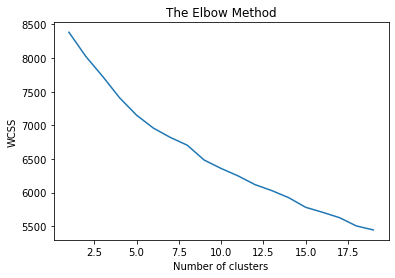

In [24]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=20,init='k-means++',random_state=0)
kmeans.fit(tf_matrix)

df['clusters'] = kmeans.labels_
df.head()

,No_of_Reviews,Other_Ratings,Changed_Tag,Cuisines,Meals,Distance,clusters
0,18,4.166667,All reviews borscht fair trade cottage chee...,Canadian Canadian Vegetarian Friendly Vegan Op...,Breakfast Lunch Brunch,13244.803799,3
1,58,3.750000,All reviews pizza pineapple ham salad bbq...,Italian Pizza Canadian Italian Pizza Canadian,Lunch Dinner,13245.597580,13
2,199,3.750000,All reviews prime rib steak half lobster c...,Steakhouse Bar Canadian American American S...,Dinner After-hours,13244.833517,4
3,51,4.250000,All reviews sushi fish soup crazy boy all ...,Japanese Sushi Asian Japanese Sushi Asian,Lunch Dinner,13247.435206,11
4,342,4.000000,All reviews brunch pies borscht roast beef...,American Canadian American Canadian Vegetaria...,Breakfast Lunch Dinner Brunch After-hours,13247.572226,3


In [26]:
italian =  df[df['clusters'] == 3]
italian.head(10)

,No_of_Reviews,Other_Ratings,Changed_Tag,Cuisines,Meals,Distance,clusters
0,18,4.166667,All reviews borscht fair trade cottage chee...,Canadian Canadian Vegetarian Friendly Vegan Op...,Breakfast Lunch Brunch,13244.803799,3
4,342,4.000000,All reviews brunch pies borscht roast beef...,American Canadian American Canadian Vegetaria...,Breakfast Lunch Dinner Brunch After-hours,13247.572226,3
13,9,0.000000,All reviews burger fries triple o sauce di...,Canadian Canadian,Breakfast Lunch Dinner,13245.712905,3
35,92,4.250000,All reviews brunch reuben sandwich frittata...,Canadian Canadian Vegetarian Friendly Vegan Op...,Breakfast Lunch Brunch,13247.428777,3
49,342,4.000000,All reviews brunch pies borscht roast beef...,American Canadian American Canadian Vegetaria...,Breakfast Lunch Dinner Brunch After-hours,13247.572226,3
51,92,4.250000,All reviews brunch reuben sandwich frittata...,Canadian Canadian Vegetarian Friendly Vegan Op...,Breakfast Lunch Brunch,13247.428777,3
57,462,4.250000,All reviews brunch artisan salad beef tips ...,Canadian Canadian Vegetarian Friendly Vegan Op...,Breakfast Lunch Dinner Brunch,13248.907201,3
93,152,3.875000,All reviews halibut pasta prawns burger p...,Canadian Canadian Vegetarian Friendly,Lunch Dinner,13322.706955,3
111,724,4.375000,All reviews rack of lamb halibut meatballs ...,Canadian Canadian Vegetarian Friendly Gluten F...,Brunch Lunch Dinner Drinks,13205.874004,3
113,372,3.375000,All reviews omelet fruit oatmeal breakfast...,American Canadian American Canadian Vegetaria...,Brunch Breakfast Lunch Dinner,13205.954696,3
